<b> This Notebook is used to Visualize the User Browsing Behavior </b>

<b style = "color : red" > 1. Including all the import statements </b>

In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100
from itertools import islice
import urllib2
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from DatumBox import DatumBox
import re
from urlparse import urlparse
import seaborn as sns # To have more than seven colors in pie diagram
import plotly.plotly as py # For Gantt Chart
import plotly.figure_factory as ff # For Gantt Chart

<b style = "color : red" > 2. Read the Data from the CSV file with pandas </b>

In [3]:
data = pd.read_csv('lab_pc5.csv')
data.head()

,id,lastVisitTime,title,typedCount,url,visitCount
0,759,8/25/2017 8:03:59 AM,NaN,0,https://chrome.google.com/webstore/detail/expo...,1
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,0,https://chrome.google.com/webstore/detail/expo...,1
2,757,8/25/2017 8:03:39 AM,NaN,0,https://chrome.google.com/webstore/search/expo...,1
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,0,https://chrome.google.com/webstore/category/ex...,1
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,0,https://chrome.google.com/webstore?utm_source=...,1


<b style = "color : red" > 3. Cleaning up the data by removing the unwanted fields </b>

In [4]:
#data = data.drop(["[]_id",'<ROOT>_id','typedCount'],axis=1)
#data = data.dropna()
#data.drop(48)
data.head()

,id,lastVisitTime,title,typedCount,url,visitCount
0,759,8/25/2017 8:03:59 AM,NaN,0,https://chrome.google.com/webstore/detail/expo...,1
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,0,https://chrome.google.com/webstore/detail/expo...,1
2,757,8/25/2017 8:03:39 AM,NaN,0,https://chrome.google.com/webstore/search/expo...,1
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,0,https://chrome.google.com/webstore/category/ex...,1
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,0,https://chrome.google.com/webstore?utm_source=...,1


<b style = "color : red" >4. categorizing the URL</b>

In [5]:
TAG_RE = re.compile(r"<[^>]+>")
def remove_tags(text):
    return TAG_RE.sub('', text)

# Clean Up Function
def clean_up(text1):
    char_dic = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    temp = []
    res = ""
    temp = text1.split(' ')

    for i in temp:
        flag = 0
        for j in str(i):
            if j not in char_dic:
                flag += 1
        if (flag == 0):
            res += i
        res += " "
            
    return res


def datum_categ(text):

    datum_box = DatumBox("4e9f0a6e14a83e38d9d9fac895c84e68")
    return datum_box.topic_classification(text)

def text_extract(url):
    try:
        
        try:
            page3 = urllib2.urlopen(url).read()
        
        except urllib2.HTTPError, err:
        
            if err.code == 404:
                print "Page not found!"
                return 'Error'
        
            elif err.code == 403:
                print "Access denied!"
                return 'Error'
    
            else:
                print "Something happened! Error code", err.code
                return 'Error'
        
        except urllib2.URLError, err:
            print "Some other error happened:", err.reason
            return 'Error'
        
        #page3 = urllib2.urlopen(url).read()
    
        soup3 = BeautifulSoup(page3,"html.parser")

        final_res = ""
        #If-Else Condition to Check null case
        
        if (soup3 is None):
            print "Its NONE!"
        else:
     
            
            if (soup3.h1 is not None):
                if (clean_up(str(soup3.h1)) is not None):
                    final_res += clean_up(str(soup3.h1))
            
            if (soup3.h2 is not None):
                if (clean_up(str(soup3.h2)) is not None):
                    final_res += clean_up(str(soup3.h2))
            
            if (soup3.h3 is not None):
                if (clean_up(str(soup3.h3)) is not None):
                    final_res += clean_up(str(soup3.h3))

            if (soup3.h4 is not None):
                if (clean_up(str(soup3.h4)) is not None):
                    final_res += clean_up(str(soup3.h4))

            if (soup3.h5 is not None):
                if (clean_up(str(soup3.h5)) is not None):
                    final_res += clean_up(str(soup3.h5))

            if (soup3.h6 is not None):
                if (clean_up(str(soup3.h6)) is not None):
                    final_res += clean_up(str(soup3.h6))
            

            if (soup3.p is not None):
                if (clean_up(str(soup3.p)) is not None):
                    final_res += clean_up(str(soup3.p))
            

            if(soup3.title is not None):
                if (clean_up(str(soup3.title)) is not None):
                    final_res += clean_up(str(soup3.title))
            

            flag = ""

            if(soup3.p is not None):
                for node in soup3.findAll('p'):
                    flag += ''.join(node.findAll(text=True))

                z = clean_up(str(flag.encode('utf-8')))
                if(z is not None):
                    final_res += z
            

            desc = soup3.findAll(attrs={"name":"description"}) 
            if (len(desc) > 0):
                zi = clean_up(str(desc[0]['content'].encode('utf-8')))
                if (zi is not None):
                    final_res+= zi 
            else:
                print "DESCRIPTION IS NONE!"

        
        return final_res
        
    except urllib2.HTTPError as err:
        print "Error Occured!"
        return 0


def categ(a):
    url = a
    return datum_categ(text_extract(url))
    


In [6]:
x = data

test_data = x.loc[:,('title','url','lastVisitTime','visitCount')] 


def categorize (name):
    if('www.google' in str(name)): 
        return 'Search' 
    elif ('mail' in str(name)):
        return 'Mail'
    else:
        return categ(name)

test_data['category'] = test_data['url'].map(categorize)

test_data

DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!


No handlers could be found for logger "bs4.dammit"


DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Page not found!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Access denied!
DESCRIPTION IS NONE!
Access denied!
Access denied!
DESCRIPTION IS NONE!
Access denied!
Access denied!
Access denied!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Access denied!
DESCRIPTION IS NONE!
Access denied!
Access denied!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Access denied!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Page not found!
DESCRIPTION IS NONE!

,title,url,lastVisitTime,visitCount,category
0,NaN,https://chrome.google.com/webstore/detail/expo...,8/25/2017 8:03:59 AM,1,Computers & Technology
1,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,8/25/2017 8:03:49 AM,1,Computers & Technology
2,NaN,https://chrome.google.com/webstore/search/expo...,8/25/2017 8:03:39 AM,1,Computers & Technology
3,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,8/25/2017 8:03:31 AM,1,Computers & Technology
4,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,8/25/2017 8:03:28 AM,1,Computers & Technology
5,Oxygen - Video Song | Kavan | Hiphop Tamizha |...,https://www.youtube.com/watch?v=7M9hc_PC_Vg,7/15/2017 6:48:23 PM,1,Arts
6,Meesaya Murukku - Enna Nadanthalum (Promo Musi...,https://www.youtube.com/watch?v=FndzeAmOCLs,7/15/2017 6:48:23 PM,2,Arts
7,NaN,https://www.google.co.in/search?q=gazetteers.&...,7/15/2017 6:47:17 PM,1,Search
8,gazetteers. - Google Search,https://www.google.co.in/search?q=gazetteers.&...,7/15/2017 6:47:08 PM,1,Search
9,Azhage Tamil album song(Korean Mix) - YouTube,https://www.youtube.com/watch?v=9P4oO9F5aSM,7/15/2017 6:44:03 PM,2,Arts


<b style = "color : red" >5. Calculating the amount of time spent on each URL</b>

In [79]:
i_max = test_data.shape[0]
time_diff = []

for i in range (i_max-1,0,-1):
    j = i-1
    
    
    i_base = test_data.iloc[i]['lastVisitTime']
    j_base = test_data.iloc[j]['lastVisitTime']
    if (i_base.split('/')[0] == j_base.split('/')[0] ):
        if (i_base .split('/')[1] == j_base.split('/')[1] ):
            if (i_base.split('/')[2].split(' ')[1].split(':')[0] == j_base.split('/')[2].split(' ')[1].split(':')[0]):
                j_min = int (j_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                j_sec = int (j_base.split('/')[2].split(' ')[1].split(':')[2])
                j_time = j_min + j_sec
            

                i_min = int (i_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                i_sec = int (i_base.split('/')[2].split(' ')[1].split(':')[2])
                i_time = i_min + i_sec
            
                time_diff.append(j_time - i_time)
            else:
                time_diff.append('NA')
        else:
             time_diff.append('NA')
    else:
         time_diff.append('NA')

time_diff.append('NA')

time_diff = time_diff[::-1]
td = pd.Series(time_diff)
test_data['timeSpent'] = td.values

In [80]:
test_data

,title,url,lastVisitTime,visitCount,category,timeSpent,session
0,NaN,https://chrome.google.com/webstore/detail/expo...,8/25/2017 8:03:59 AM,1,Computers & Technology,NA,0
1,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,8/25/2017 8:03:49 AM,1,Computers & Technology,10,1
2,NaN,https://chrome.google.com/webstore/search/expo...,8/25/2017 8:03:39 AM,1,Computers & Technology,10,1
3,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,8/25/2017 8:03:31 AM,1,Computers & Technology,8,1
4,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,8/25/2017 8:03:28 AM,1,Computers & Technology,3,1
5,Oxygen - Video Song | Kavan | Hiphop Tamizha |...,https://www.youtube.com/watch?v=7M9hc_PC_Vg,7/15/2017 6:48:23 PM,1,Arts,NA,0
6,Meesaya Murukku - Enna Nadanthalum (Promo Musi...,https://www.youtube.com/watch?v=FndzeAmOCLs,7/15/2017 6:48:23 PM,2,Arts,0,2
7,NaN,https://www.google.co.in/search?q=gazetteers.&...,7/15/2017 6:47:17 PM,1,Search,66,2
8,gazetteers. - Google Search,https://www.google.co.in/search?q=gazetteers.&...,7/15/2017 6:47:08 PM,1,Search,9,2
9,Azhage Tamil album song(Korean Mix) - YouTube,https://www.youtube.com/watch?v=9P4oO9F5aSM,7/15/2017 6:44:03 PM,2,Arts,185,2


<b style = "color : red" >6. Finding the Sessions</b>

In [8]:
count = 0

test_data['session'] = ""
for i in range(0,len(test_data)):
    if test_data['timeSpent'][i] is 'NA':
        count+=1

    if (test_data['timeSpent'][i] is not 'NA'):
        test_data['session'][i] = count
    else:
        test_data['session'][i] = 0
    

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
test_data

,title,url,lastVisitTime,visitCount,category,timeSpent,session
0,NaN,https://chrome.google.com/webstore/detail/expo...,8/25/2017 8:03:59 AM,1,Computers & Technology,NA,0
1,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,8/25/2017 8:03:49 AM,1,Computers & Technology,10,1
2,NaN,https://chrome.google.com/webstore/search/expo...,8/25/2017 8:03:39 AM,1,Computers & Technology,10,1
3,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,8/25/2017 8:03:31 AM,1,Computers & Technology,8,1
4,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,8/25/2017 8:03:28 AM,1,Computers & Technology,3,1
5,Oxygen - Video Song | Kavan | Hiphop Tamizha |...,https://www.youtube.com/watch?v=7M9hc_PC_Vg,7/15/2017 6:48:23 PM,1,Arts,NA,0
6,Meesaya Murukku - Enna Nadanthalum (Promo Musi...,https://www.youtube.com/watch?v=FndzeAmOCLs,7/15/2017 6:48:23 PM,2,Arts,0,2
7,NaN,https://www.google.co.in/search?q=gazetteers.&...,7/15/2017 6:47:17 PM,1,Search,66,2
8,gazetteers. - Google Search,https://www.google.co.in/search?q=gazetteers.&...,7/15/2017 6:47:08 PM,1,Search,9,2
9,Azhage Tamil album song(Korean Mix) - YouTube,https://www.youtube.com/watch?v=9P4oO9F5aSM,7/15/2017 6:44:03 PM,2,Arts,185,2


<b style = "color : red" >7. Splitting the Dataframe into different sessions</b>

In [10]:
categ_color = {"Arts":'#0099ff',"Business & Economy":'#33cc33',"Computers & Technology":'#ff3300',"Health":'#cc66ff',"Home & Domestic Life":'#993333',"News":'#669999',"Shopping":'#ffcccc',"Society":'#ffff00',"Sports":'#ff8533',"Recreation & Activities":'#006666',"Reference & Education":'#00ffff',"Science":'#ff00ff',"Search":'#000000',"Mail":'#ff9900',"Error":'#4267a3'}
categ_time = {"Arts":0 ,"Business & Economy":0,"Computers & Technology":0,"Health":0,"Home & Domestic Life":0,"News":0,"Shopping":0,"Society":0,"Sports":0,"Recreation & Activities":0,"Reference & Education":0,"Science":0,"Search":0,"Mail":0,"Error":0}

In [11]:
df_categ_set = []
df_time_set = []
df_color_set = []

categ_flag = []
time_flag = []
color_flag = []
count = 0
for i in range(1,len(test_data)):    
    
    if (test_data['timeSpent'][i] is 'NA'):
        df_categ_set.append(categ_flag)
        df_time_set.append(time_flag)
        df_color_set.append(color_flag)
        categ_flag = []
        time_flag = []
        color_flag = []
        count+=1
    else:
        categ_flag.append(str(test_data['category'][i]))
        time_flag.append(test_data['timeSpent'][i])
        color_flag.append(categ_color[str(test_data['category'][i])])
    
    #print test_data['category'][i]

In [12]:
print df_color_set

[['#ff3300', '#ff3300', '#ff3300', '#ff3300'], ['#0099ff', '#000000', '#000000', '#0099ff', '#0099ff', '#0099ff', '#ff00ff', '#0099ff', '#ff00ff', '#ff3300', '#000000', '#0099ff', '#0099ff', '#0099ff', '#ff00ff', '#0099ff', '#0099ff', '#0099ff', '#0099ff', '#ff00ff', '#000000', '#000000', '#000000', '#000000', '#000000', '#ff00ff', '#ff3300', '#ff3300', '#ff00ff'], ['#ff00ff', '#ff00ff', '#ff00ff', '#ff3300', '#ff3300', '#ff00ff', '#ff00ff', '#00ffff', '#ff00ff', '#ff00ff'], ['#ff3300', '#ff3300', '#ff00ff', '#ff3300', '#00ffff', '#ff3300', '#00ffff', '#ff00ff', '#000000', '#000000', '#ff3300', '#ff3300', '#ff00ff', '#ff3300', '#ff00ff', '#000000', '#000000', '#ff3300', '#ff00ff', '#ff3300', '#ff3300', '#ff3300', '#ff3300', '#ff00ff', '#ff3300', '#ff3300', '#ff3300'], [], ['#000000'], ['#00ffff', '#ff00ff', '#ff00ff', '#ff00ff', '#ff00ff', '#00ffff', '#ff3300', '#ff00ff', '#ff3300', '#ff3300', '#000000', '#ff00ff', '#ff00ff', '#ff00ff', '#ff3300', '#ff00ff', '#ff3300', '#00ffff', '#00f

<br>
<br>
<b style = "color : red ;font-size: 20px " >6. Visualizing the Data to understand the browsing behavior</b>
<br>
<br>

In [76]:
categ_color = {"Arts":'#0099ff',"Business & Economy":'#33cc33',"Computers & Technology":'#ff3300',"Health":'#cc66ff',"Home & Domestic Life":'#993333',"News":'#669999',"Shopping":'#ffcccc',"Society":'#ffff00',"Sports":'#ff8533',"Recreation & Activities":'#006666',"Reference & Education":'#00ffff',"Science":'#ff00ff',"Search":'#000000',"Mail":'#ff9900',"Error":'#4267a3'}
categ_time = {"Arts":0 ,"Business & Economy":0,"Computers & Technology":0,"Health":0,"Home & Domestic Life":0,"News":0,"Shopping":0,"Society":0,"Sports":0,"Recreation & Activities":0,"Reference & Education":0,"Science":0,"Search":0,"Mail":0,"Error":0}

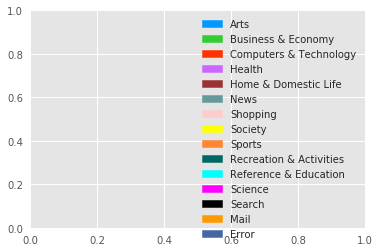

In [77]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

a= mpatches.Patch(color='#0099ff', label="Arts")
b= mpatches.Patch(color='#33cc33', label="Business & Economy")
c= mpatches.Patch(color='#ff3300', label="Computers & Technology")
d = mpatches.Patch(color='#cc66ff', label="Health")
e = mpatches.Patch(color='#993333', label="Home & Domestic Life")
f = mpatches.Patch(color='#669999', label="News")
g = mpatches.Patch(color='#ffcccc', label="Shopping")
h = mpatches.Patch(color='#ffff00', label="Society")
i = mpatches.Patch(color='#ff8533', label="Sports")
j = mpatches.Patch(color='#006666', label="Recreation & Activities")
k = mpatches.Patch(color='#00ffff', label="Reference & Education")
l = mpatches.Patch(color='#ff00ff', label="Science")
m = mpatches.Patch(color='#000000', label="Search")
n = mpatches.Patch(color='#ff9900', label="Mail")
o = mpatches.Patch(color='#4267a3', label="Error")

plt.legend(handles=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o])
plt.show()

<br>
<br>
<b style = "color : black ;font-size: 15px " >6.1 Visualizing the Data to understand the browsing behavior</b>
<br>
<br>

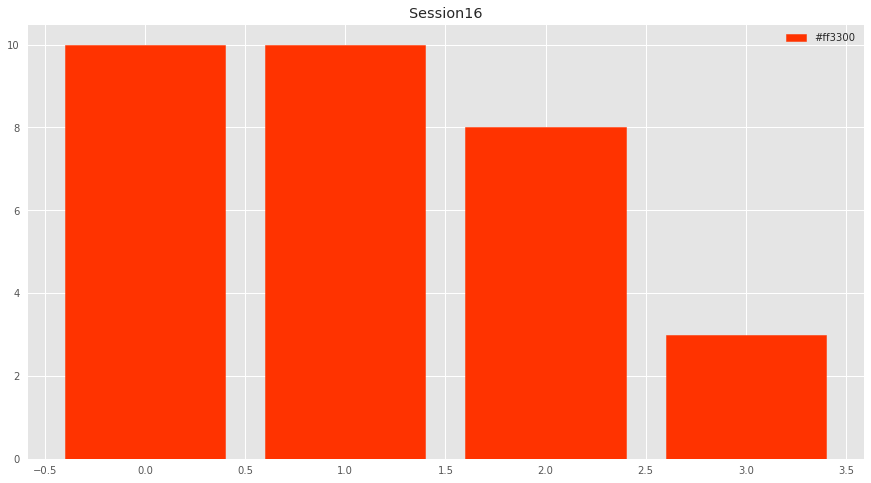

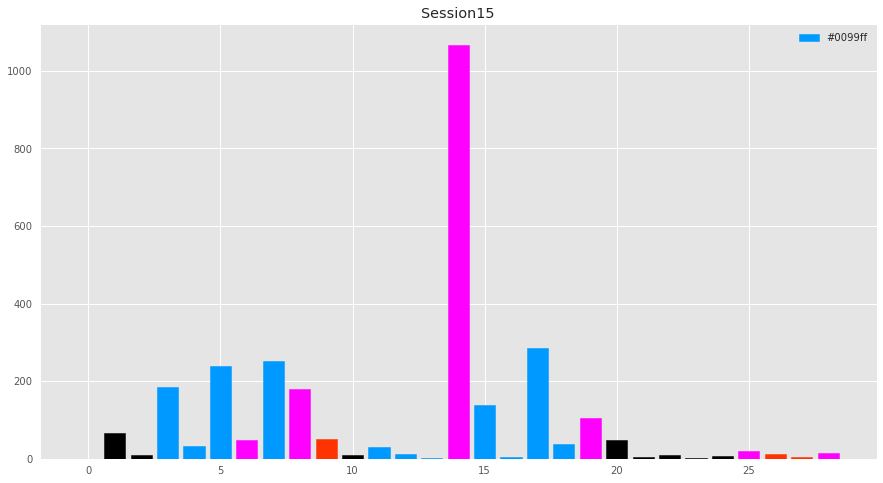

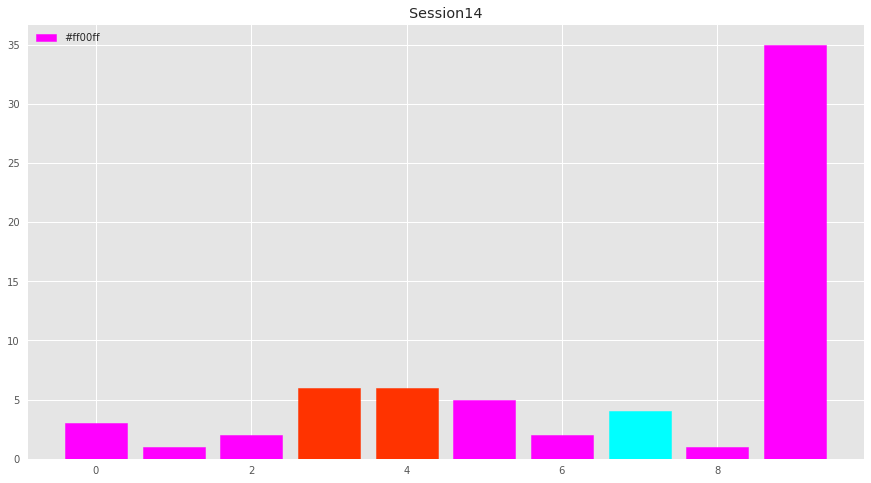

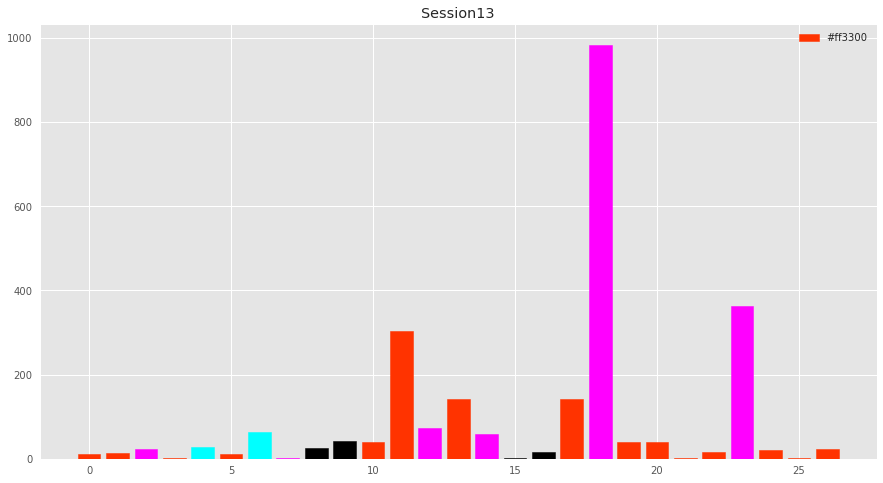

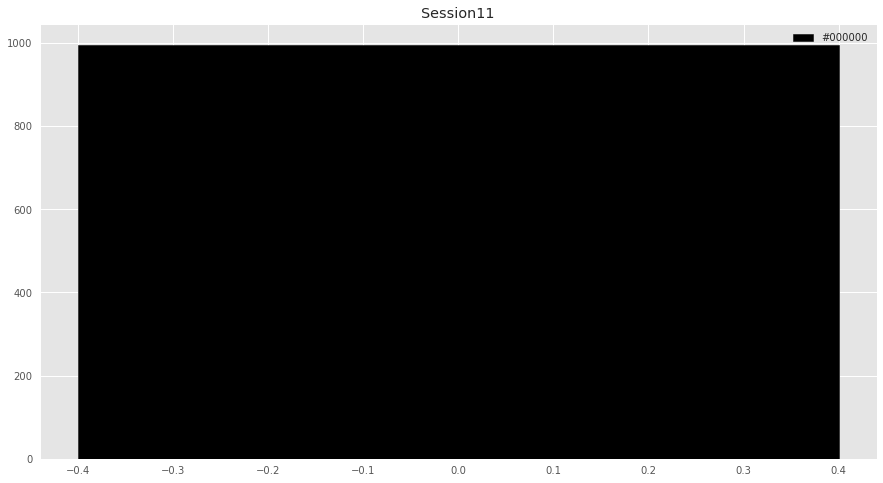

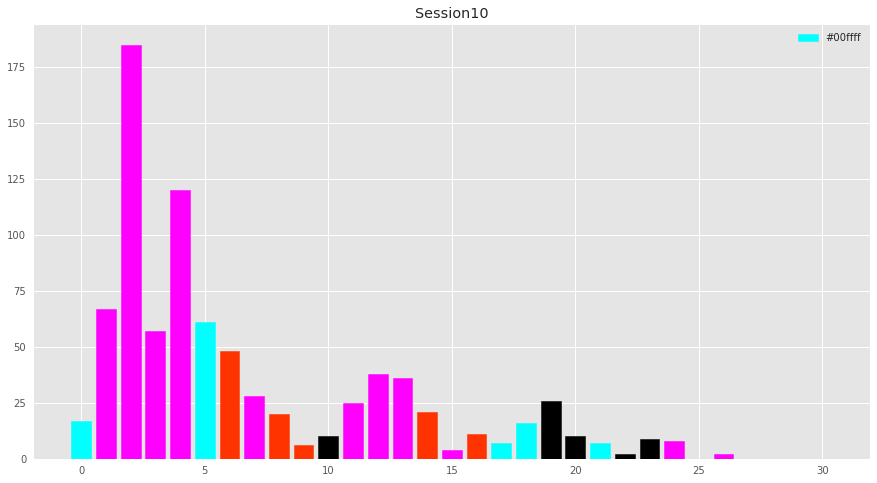

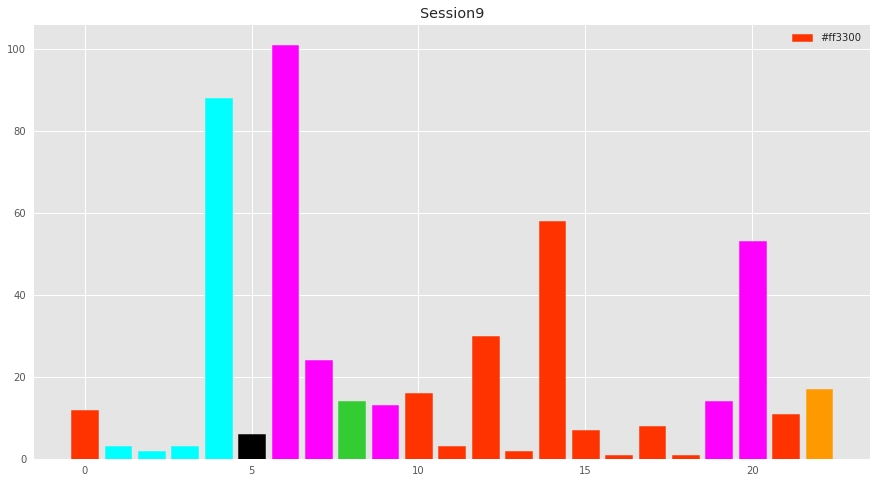

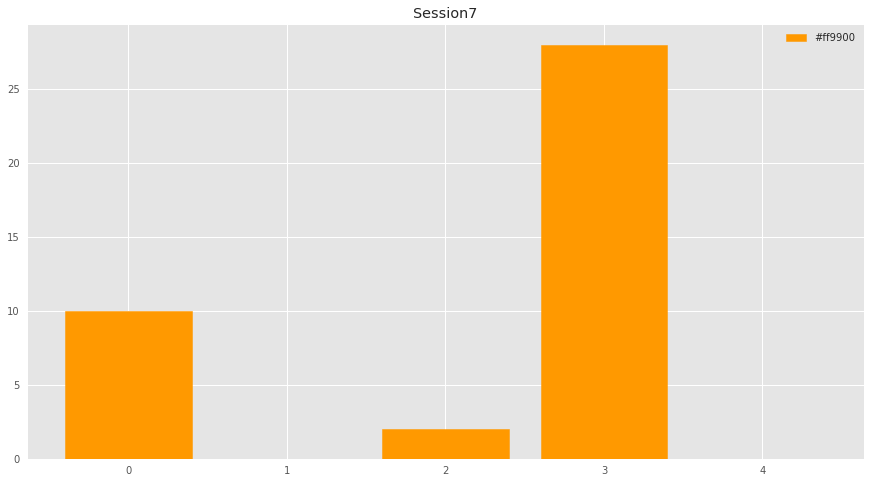

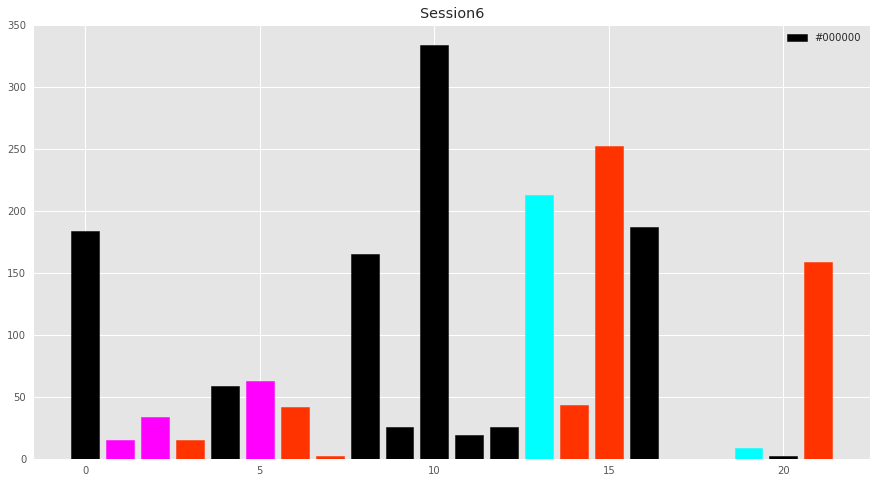

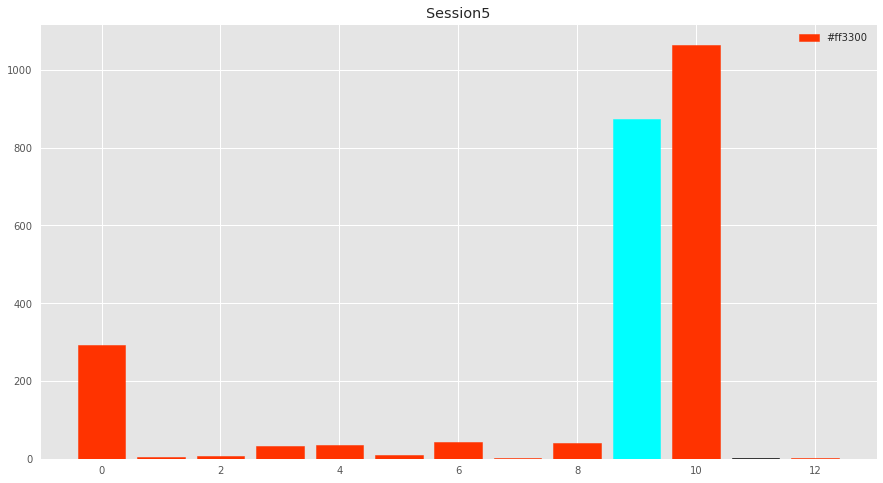

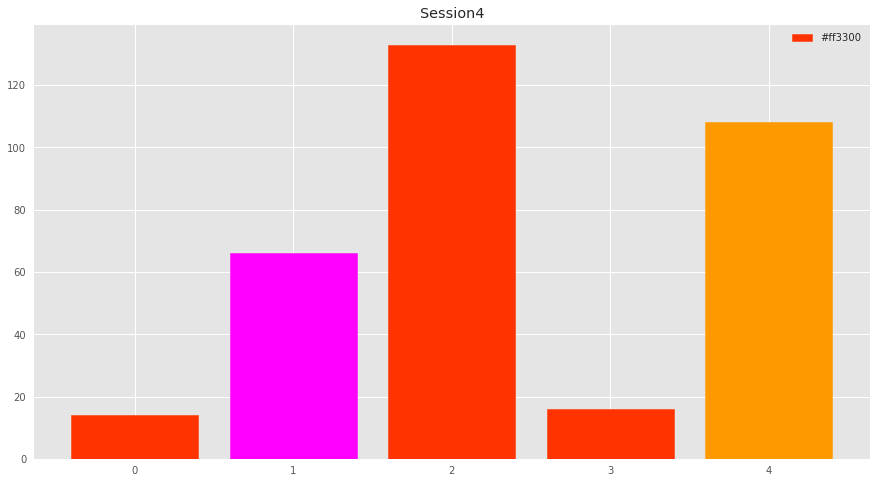

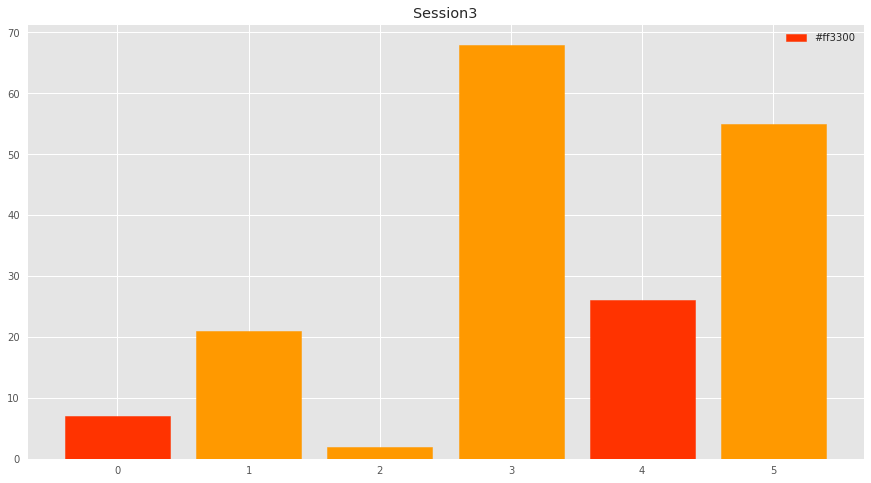

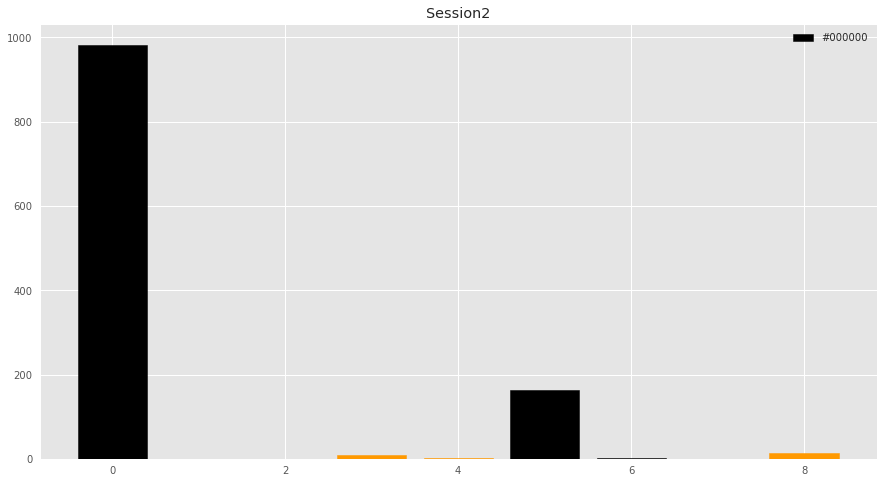

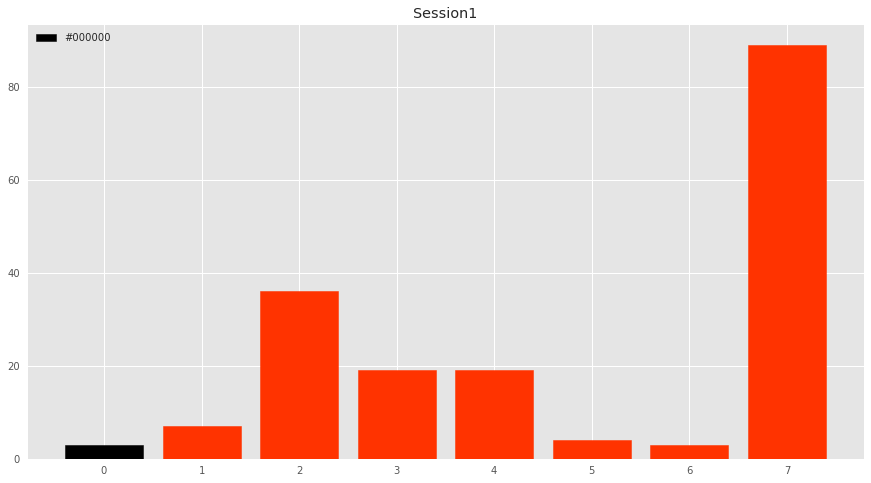

In [78]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
a= mpatches.Patch(color='#0099ff', label="Arts")
b= mpatches.Patch(color='#33cc33', label="Business & Economy")
c= mpatches.Patch(color='#ff3300', label="Computers & Technology")
d = mpatches.Patch(color='#cc66ff', label="Health")
e = mpatches.Patch(color='#993333', label="Home & Domestic Life")
f = mpatches.Patch(color='#669999', label="News")
g = mpatches.Patch(color='#ffcccc', label="Shopping")
h = mpatches.Patch(color='#ffff00', label="Society")
i = mpatches.Patch(color='#ff8533', label="Sports")
j = mpatches.Patch(color='#006666', label="Recreation & Activities")
k = mpatches.Patch(color='#00ffff', label="Reference & Education")
l = mpatches.Patch(color='#ff00ff', label="Science")
m = mpatches.Patch(color='#000000', label="Search")
n = mpatches.Patch(color='#ff9900', label="Mail")
o = mpatches.Patch(color='#4267a3', label="Error")

count = len(df_time_set)
for i in range(0,len(df_time_set)):
    time_spent_list = df_time_set[i]
    categ_list = df_categ_set[i]
    if (len(time_spent_list) > 0):
        color_list = df_color_set[i]
        figure = plt.figure(figsize=(15,8))
        pts = np.arange(len(time_spent_list))
        p = plt.bar(pts, height= time_spent_list)
        for i in range(0,len(time_spent_list)):
            p.patches[i].set_color(color_list[i])
        plt.legend(color_list)
        plt.title("Session" + str(count))

        
        plt.show()
    count = count - 1
        